In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

1. 自分で関数を作成

In [36]:
def label_make(label,p1='cyto',p2='RFP', p3='median_intensity'):
##npzファイルからデータ抽出
    label_tmp = np.all((label == p1) | (label == p2) | (label == p3), axis=1)
    return label_tmp

def npz_load(fname):
##cell TKで作成したnpzファイル読み込み
    data_tmp = np.load(fname,allow_pickle=True)
    arr_tmp = data_tmp['arr']
    labels_tmp = data_tmp['labels']
    time_tmp = data_tmp['time']
    return data_tmp, arr_tmp, labels_tmp, time_tmp

def dataframe_make(arr, label, time, nuc='nuc',cyto='cyto', ):
##datafarame作成
    df_tmp = pd.DataFrame()
    for i in range(arr.shape[1]):
        tmp_nuc = arr[label_make(label=label, p1=nuc),i,:].flatten()
        tmp_cyto = arr[label_make(label=label, p1=cyto),i,:].flatten()
        tmp = pd.DataFrame([tmp_nuc,tmp_cyto],index=["nuc","cyto"]).T
        tmp["c/n"] = tmp_cyto/tmp_nuc
        tmp["cell_id"] = np.full(time.shape[0],i)
        tmp["time"] = np.arange(time.shape[0])
        df_tmp = pd.concat([df_tmp,tmp])
    return df_tmp

def heatmap_make(df,arr,sort_method=None):
    heat = pd.DataFrame(df["c/n"].values.reshape(int(len(df)/arr.shape[2]),arr.shape[2]))
    if sort_method=='sum':
        heat["sum"] = heat.sum(axis=1)
        heat = heat.sort_values("sum",ascending=False)
        heat = heat.drop("sum", axis=1)
    elif sort_method=='Nan':
        heat["Nan"] = heat.isnull().sum(axis=1)
        heat = heat.sort_values("Nan",ascending=True)
        heat = heat.drop("Nan", axis=1)
    else :
        heat=heat
    return heat

In [3]:
data1, arr1, label1, time1 = npz_load("/Users/sakaikeiichirou/CellTK/output/20210208-PKAKTR1-bPAC-1/df.npz")
data2, arr2, label2, time2 = npz_load("/Users/sakaikeiichirou/CellTK/output/20210208-PKAKTR1-bPAC-2/df.npz")
data3, arr3, label3, time3 = npz_load("/Users/sakaikeiichirou/CellTK/output/20210208-PKAKTR1-bPAC-3/df.npz")
data4, arr4, label4, time4 = npz_load("/Users/sakaikeiichirou/CellTK/output/20210208-PKAKTR1-bPAC-4/df.npz")

arrs = [arr1, arr2, arr3, arr4]
labels = [label1, label2, label3, label4]
times = [time1, time2, time3, time4]

In [4]:
df_list = [pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()]

for i in range(4):
    if i==0:
        nuc = 'nuc-2'
    else:
        nuc = 'nuc'
    df_list[i] = dataframe_make(arr=arrs[i], label=labels[i], time=times[i], nuc=nuc)

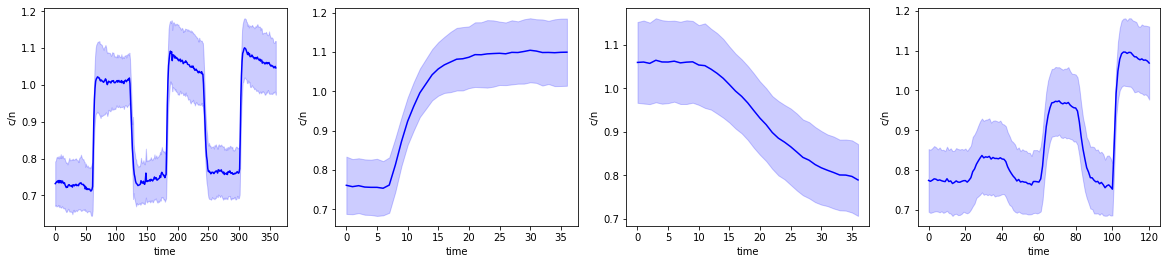

In [8]:
plt.figure(figsize=(20,4))
for i in range(4):
    plt.subplot(1,4,i+1)
    sns.lineplot(data=df_list[i], x="time", y="c/n", ci="sd", color="blue")

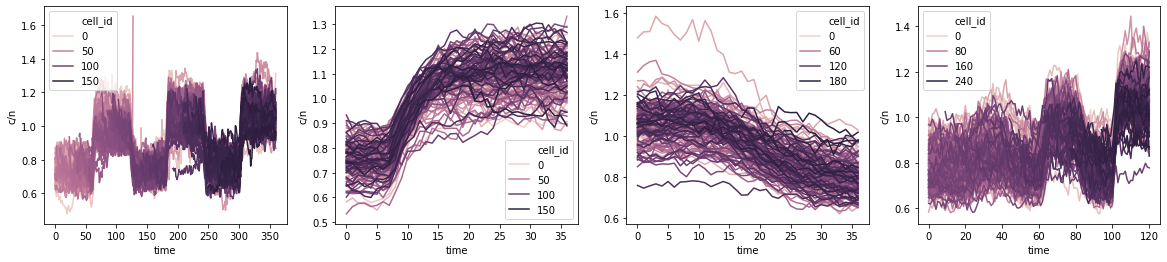

In [10]:
plt.figure(figsize=(20,4))
for i in range(4):
    plt.subplot(1,4,i+1)
    sns.lineplot(data=df_list[i], x="time", y="c/n", ci="sd", hue="cell_id")

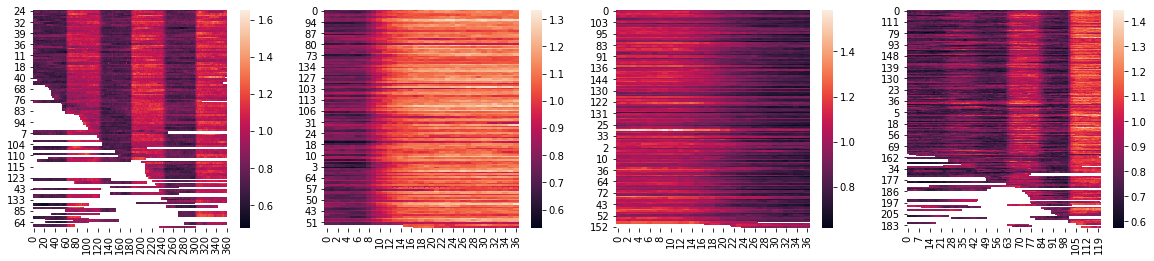

In [40]:
plt.figure(figsize=(20,4))
for i in range(4):
    plt.subplot(1,4,i+1)
    sns.heatmap(heatmap_make(df_list[i],arrs[i], sort_method='Nan'))

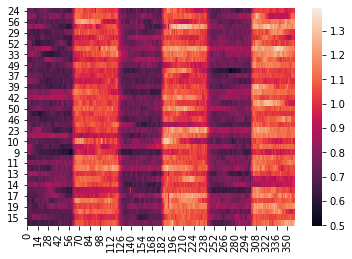

In [39]:
sns.heatmap(heatmap_make(df_list[0],arrs[0], sort_method='Nan').iloc[:40,:])